# Scatter Plot analysis toward the number of tweets and statistics of covid-19 in English-spoken countries

This notebook PLOT the number of tweets with 3 different states in US and the states of four English-spoken countries including US, UK, Australia and Canada

In [8]:
#import the important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json as js
import ast
import re
from datetime import datetime
from datetime import timedelta
import branca.colormap as cm
from branca.colormap import linear

In [9]:
#read the file of covid
covid_df = pd.read_csv("Data_Source\international-covid-data.csv")
covid_df['new_cases'].fillna(0)
covid_df['new_deaths'].fillna(0)

#remove the date that is out of the bounb 
def check_date_inbound(df):
    start_date = datetime.strptime('2020-03-19', '%Y-%m-%d')
    delta = int((datetime.strptime(df['date'], '%Y-%m-%d')-start_date).days)
    if delta < 0:
        return False
    else:
        return True

covid_df['date_inbound'] = covid_df.apply(check_date_inbound,axis = 1)
covid_df = covid_df[covid_df['date_inbound'] == True]
del covid_df['date_inbound']

#get the week index
def get_week_index(df):
    start_date = datetime.strptime('2020-03-19', '%Y-%m-%d')
    delta = int((datetime.strptime(df['date'], '%Y-%m-%d')-start_date).days)    
    return int(delta/7)

covid_df['week_index'] = covid_df.apply(get_week_index,axis = 1)
covid_df 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,week_index
24,AFG,Asia,Afghanistan,2020-03-19,25.0,1.0,1.857,NaN,NaN,0.000,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
25,AFG,Asia,Afghanistan,2020-03-20,29.0,4.0,2.286,NaN,NaN,0.000,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
26,AFG,Asia,Afghanistan,2020-03-21,30.0,1.0,2.143,NaN,NaN,0.000,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
27,AFG,Asia,Afghanistan,2020-03-22,34.0,4.0,2.571,1.0,1.0,0.143,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
28,AFG,Asia,Afghanistan,2020-03-23,41.0,7.0,3.286,1.0,0.0,0.143,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99351,ZWE,Africa,Zimbabwe,2021-06-26,46018.0,801.0,627.143,1725.0,4.0,8.429,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,66
99352,ZWE,Africa,Zimbabwe,2021-06-27,46442.0,424.0,666.143,1736.0,11.0,9.143,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,66
99353,ZWE,Africa,Zimbabwe,2021-06-28,47284.0,842.0,727.000,1749.0,13.0,9.143,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,66
99354,ZWE,Africa,Zimbabwe,2021-06-29,48533.0,1249.0,831.286,1761.0,12.0,10.000,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,66


In [10]:
world_twitter_df = pd.read_csv("Data_Source/country_weekly_counts_sentiment_avg.csv")
del world_twitter_df['Unnamed: 0']
#Limit the number data after 15 weeks(4months)
world_twitter_df = world_twitter_df[world_twitter_df['week_index']>15]
world_twitter_df['count']= world_twitter_df['count']/7
world_twitter_df['Postive_tweets']= world_twitter_df['Postive_tweets']/7
world_twitter_df['Negative_tweets']= world_twitter_df['Negative_tweets']/7

In [11]:
#read the number of count at usa
us_covid_df = covid_df[covid_df['iso_code']=="USA"]
us_twitter_df = world_twitter_df[world_twitter_df['country_code']=='US']


#get the value of case and death
def get_new_cases_value(df):
    temp_df = us_covid_df[us_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

us_twitter_df['new_cases'] = us_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = us_covid_df[us_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

us_twitter_df['new_deaths'] = us_twitter_df.apply(get_new_death_value,axis = 1)

C:\Software\Anaconda\Software\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


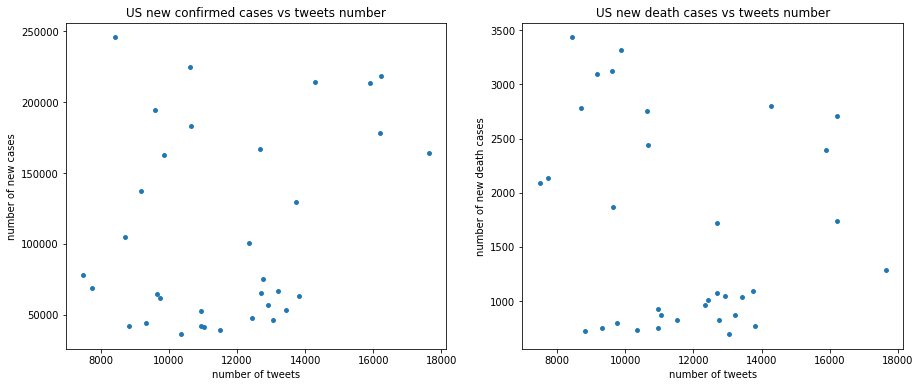

In [12]:
#draw the scatter plot
plt.figure(figsize=(15,6)) 
ax1 = plt.subplot(1,2,1)
ax1 =plt.scatter(us_twitter_df['count'],us_twitter_df['new_cases'],s=15)
ax1 =plt.xlabel('number of tweets')
ax1 =plt.ylabel('number of new cases')
ax1 =plt.title('US new confirmed cases vs tweets number')
ax2 = plt.subplot(1,2,2)
ax2 =plt.scatter(us_twitter_df['count'],us_twitter_df['new_deaths'],s=15)
ax2 =plt.xlabel('number of tweets')
ax2 =plt.ylabel('number of new death cases')
ax2 =plt.title('US new death cases vs tweets number')


plt.show()

In [13]:
#read the number of count at usa
ca_covid_df = covid_df[covid_df['iso_code']=="CAN"]
ca_twitter_df = world_twitter_df[world_twitter_df['country_code']=='CA']

#get the value of case and death
def get_new_cases_value(df):
    temp_df = ca_covid_df[ca_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

ca_twitter_df['new_cases'] = ca_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = ca_covid_df[ca_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

ca_twitter_df['new_deaths'] = ca_twitter_df.apply(get_new_death_value,axis = 1)

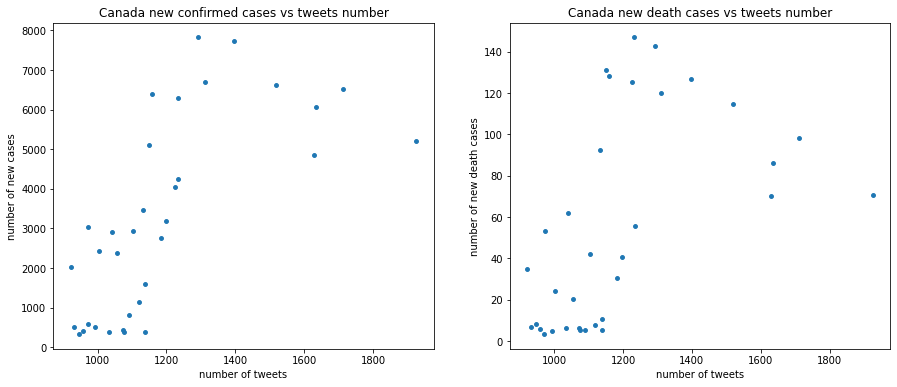

In [14]:
#draw the scatter plot
plt.figure(figsize=(15,6)) 
ax1 = plt.subplot(1,2,1)
ax1 =plt.scatter(ca_twitter_df['count'],ca_twitter_df['new_cases'],s=15)
ax1 =plt.xlabel('number of tweets')
ax1 =plt.ylabel('number of new cases')
ax1 =plt.title('Canada new confirmed cases vs tweets number')
ax2 = plt.subplot(1,2,2)
ax2 =plt.scatter(ca_twitter_df['count'],ca_twitter_df['new_deaths'],s=15)
ax2 =plt.xlabel('number of tweets')
ax2 =plt.ylabel('number of new death cases')
ax2 =plt.title('Canada new death cases vs tweets number')


plt.show()

In [15]:
#read the number of count at usa
uk_covid_df = covid_df[covid_df['iso_code']=="GBR"]
uk_twitter_df = world_twitter_df[world_twitter_df['country_code']=='BR']


#get the value of case and death
def get_new_cases_value(df):
    temp_df = uk_covid_df[uk_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

uk_twitter_df['new_cases'] = uk_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = uk_covid_df[uk_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

uk_twitter_df['new_deaths'] = uk_twitter_df.apply(get_new_death_value,axis = 1)


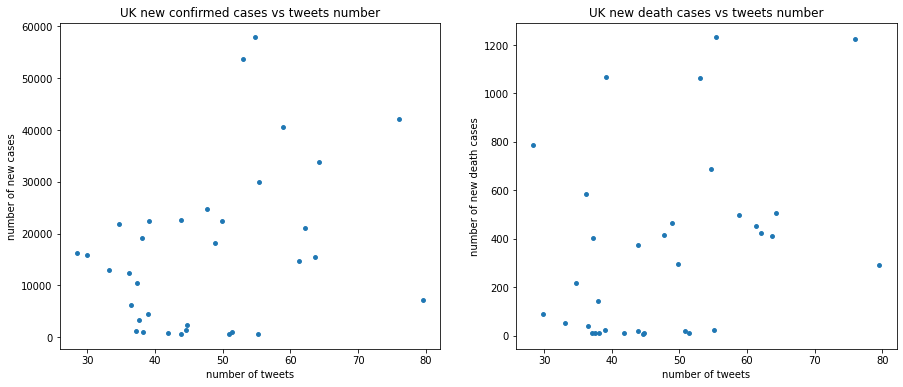

In [16]:
#draw the scatter plot
plt.figure(figsize=(15,6)) 
ax1 = plt.subplot(1,2,1)
ax1 =plt.scatter(uk_twitter_df['count'],uk_twitter_df['new_cases'],s=15)
ax1 =plt.xlabel('number of tweets')
ax1 =plt.ylabel('number of new cases')
ax1 =plt.title('UK new confirmed cases vs tweets number')
ax2 = plt.subplot(1,2,2)
ax2 =plt.scatter(uk_twitter_df['count'],uk_twitter_df['new_deaths'],s=15)
ax2 =plt.xlabel('number of tweets')
ax2 =plt.ylabel('number of new death cases')
ax2 =plt.title('UK new death cases vs tweets number')


plt.show()

In [17]:
au_covid_df = covid_df[covid_df['iso_code']=="AUS"]
au_twitter_df = world_twitter_df[world_twitter_df['country_code']=='AU']


#get the value of case and death
def get_new_cases_value(df):
    temp_df = au_covid_df[au_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

au_twitter_df['new_cases'] = au_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = au_covid_df[au_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

au_twitter_df['new_deaths'] = au_twitter_df.apply(get_new_death_value,axis = 1)

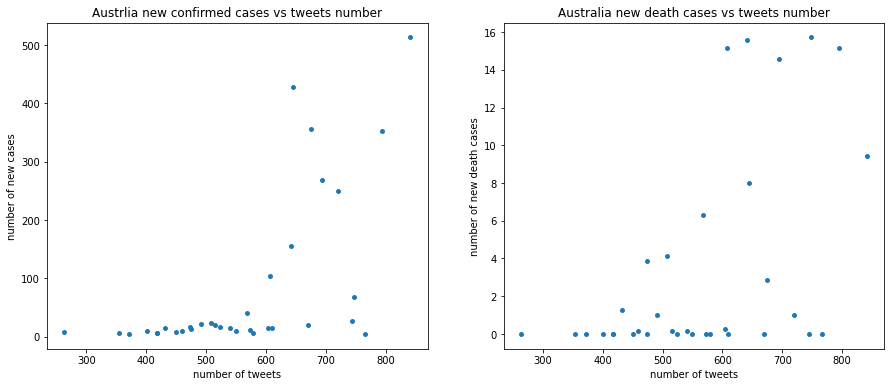

In [18]:
#draw the scatter plot
plt.figure(figsize=(15,6)) 
ax1 = plt.subplot(1,2,1)
ax1 =plt.scatter(au_twitter_df['count'],au_twitter_df['new_cases'],s=15)
ax1 =plt.xlabel('number of tweets')
ax1 =plt.ylabel('number of new cases')
ax1 =plt.title('Austrlia new confirmed cases vs tweets number')
ax2 = plt.subplot(1,2,2)
ax2 =plt.scatter(au_twitter_df['count'],au_twitter_df['new_deaths'],s=15)
ax2 =plt.xlabel('number of tweets')
ax2 =plt.ylabel('number of new death cases')
ax2 =plt.title('Australia new death cases vs tweets number')


plt.show()

In [19]:
india_covid_df = covid_df[covid_df['iso_code']=="IND"]
india_twitter_df = world_twitter_df[world_twitter_df['country_code']=='IN']


#get the value of case and death
def get_new_cases_value(df):
    temp_df = india_covid_df[india_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

india_twitter_df['new_cases'] = india_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = india_covid_df[india_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

india_twitter_df['new_deaths'] = india_twitter_df.apply(get_new_death_value,axis = 1)


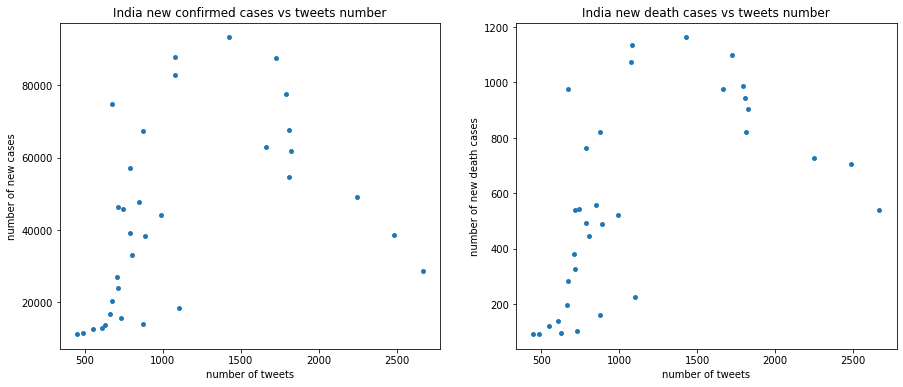

In [20]:
#draw the scatter plot
plt.figure(figsize=(15,6)) 
ax1 = plt.subplot(1,2,1)
ax1 =plt.scatter(india_twitter_df['count'],india_twitter_df['new_cases'],s=15)
ax1 =plt.xlabel('number of tweets')
ax1 =plt.ylabel('number of new cases')
ax1 =plt.title('India new confirmed cases vs tweets number')
ax2 = plt.subplot(1,2,2)
ax2 =plt.scatter(india_twitter_df['count'],india_twitter_df['new_deaths'],s=15)
ax2 =plt.xlabel('number of tweets')
ax2 =plt.ylabel('number of new death cases')
ax2 =plt.title('India new death cases vs tweets number')


plt.show()

In [21]:
sa_covid_df = covid_df[covid_df['iso_code']=="ZAF"]
sa_twitter_df = world_twitter_df[world_twitter_df['country_code']=='ZA']


#get the value of case and death
def get_new_cases_value(df):
    temp_df = sa_covid_df[sa_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

sa_twitter_df['new_cases'] = sa_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = sa_covid_df[sa_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

sa_twitter_df['new_deaths'] = sa_twitter_df.apply(get_new_death_value,axis = 1)

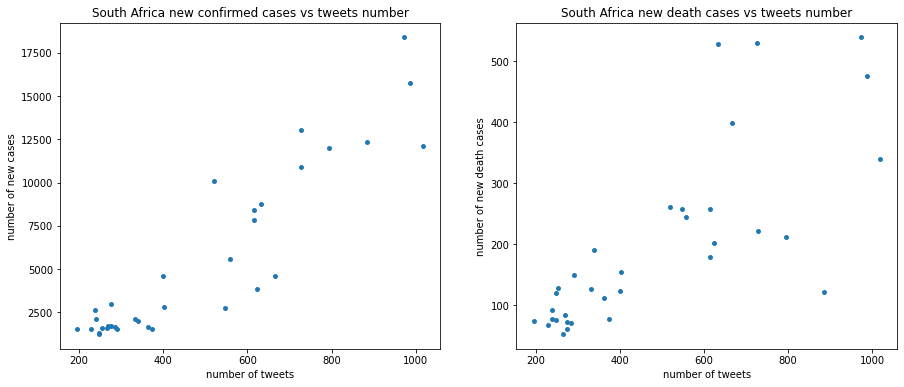

In [22]:
#draw the scatter plot
plt.figure(figsize=(15,6)) 
ax1 = plt.subplot(1,2,1)
ax1 =plt.scatter(sa_twitter_df['count'],sa_twitter_df['new_cases'],s=15)
ax1 =plt.xlabel('number of tweets')
ax1 =plt.ylabel('number of new cases')
ax1 =plt.title('South Africa new confirmed cases vs tweets number')
ax2 = plt.subplot(1,2,2)
ax2 =plt.scatter(sa_twitter_df['count'],sa_twitter_df['new_deaths'],s=15)
ax2 =plt.xlabel('number of tweets')
ax2 =plt.ylabel('number of new death cases')
ax2 =plt.title('South Africa new death cases vs tweets number')


plt.show()

In [23]:
sin_covid_df = covid_df[covid_df['iso_code']=="SGP"]
sin_twitter_df = world_twitter_df[world_twitter_df['country_code']=='SG']


#get the value of case and death
def get_new_cases_value(df):
    temp_df = sin_covid_df[sin_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

sin_twitter_df['new_cases'] = sin_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = sin_covid_df[sin_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

sin_twitter_df['new_deaths'] = sin_twitter_df.apply(get_new_death_value,axis = 1)

sin_twitter_df.sort_values(by = 'week_index',ascending=False)

,week_index,count,country_code,Postive_tweets,Negative_tweets,new_cases,new_deaths
4547,49,19.000000,SG,9.714286,2.714286,12.714286,0.000000
4548,48,17.142857,SG,6.714286,5.000000,9.857143,0.000000
4549,47,15.857143,SG,7.142857,3.000000,10.571429,0.000000
4546,46,19.571429,SG,9.857143,3.714286,20.714286,0.000000
4545,45,19.857143,SG,9.714286,2.428571,30.142857,0.000000
4533,44,26.142857,SG,9.428571,6.428571,27.714286,0.000000
4529,43,26.571429,SG,10.142857,5.857143,30.428571,0.000000
4538,42,25.142857,SG,12.000000,4.000000,29.142857,0.000000
4534,41,26.142857,SG,11.571429,5.000000,30.142857,0.000000
4535,40,26.000000,SG,13.428571,4.000000,12.428571,0.000000


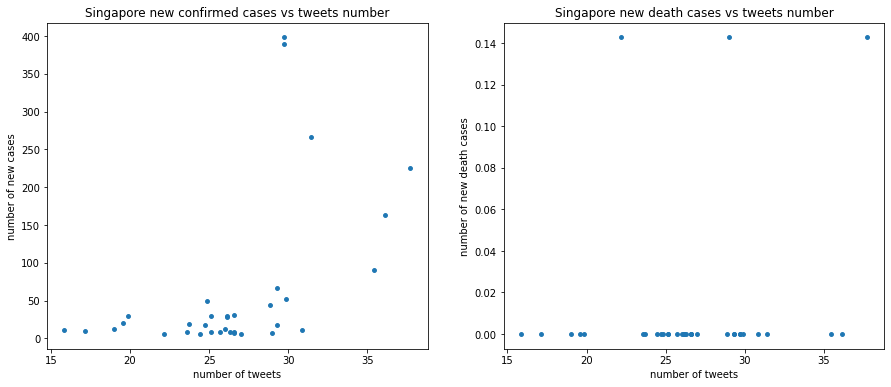

In [24]:
#draw the scatter plot
plt.figure(figsize=(15,6)) 
ax1 = plt.subplot(1,2,1)
ax1 =plt.scatter(sin_twitter_df['count'],sin_twitter_df['new_cases'],s=15)
ax1 =plt.xlabel('number of tweets')
ax1 =plt.ylabel('number of new cases')
ax1 =plt.title('Singapore new confirmed cases vs tweets number')
ax2 = plt.subplot(1,2,2)
ax2 =plt.scatter(sin_twitter_df['count'],sin_twitter_df['new_deaths'],s=15)
ax2 =plt.xlabel('number of tweets')
ax2 =plt.ylabel('number of new death cases')
ax2 =plt.title('Singapore new death cases vs tweets number')


plt.show()

In [25]:
eg_covid_df = covid_df[covid_df['iso_code']=="EGY"]
eg_twitter_df = world_twitter_df[world_twitter_df['country_code']=='EG']


#get the value of case and death
def get_new_cases_value(df):
    temp_df = eg_covid_df[eg_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

eg_twitter_df['new_cases'] = eg_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = eg_covid_df[eg_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

eg_twitter_df['new_deaths'] = eg_twitter_df.apply(get_new_death_value,axis = 1)

eg_twitter_df.sort_values(by = 'week_index',ascending=False)


C:\Software\Anaconda\Software\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,week_index,count,country_code,Postive_tweets,Negative_tweets,new_cases,new_deaths
1753,49,6.000000,EG,3.714286,0.714286,588.142857,46.714286
1767,48,5.000000,EG,2.285714,1.000000,624.857143,49.285714
1771,47,3.857143,EG,2.000000,0.571429,612.428571,49.428571
1762,46,5.428571,EG,2.285714,1.000000,552.142857,49.142857
1755,45,6.000000,EG,3.857143,0.428571,537.714286,49.285714
1756,44,5.857143,EG,2.142857,1.714286,685.428571,52.571429
1758,43,5.571429,EG,1.714286,1.571429,892.000000,55.000000
1734,42,10.428571,EG,4.571429,2.428571,1018.428571,55.285714
1733,41,10.571429,EG,5.285714,2.428571,1278.000000,57.000000
1724,40,17.142857,EG,6.571429,2.285714,1238.857143,52.428571


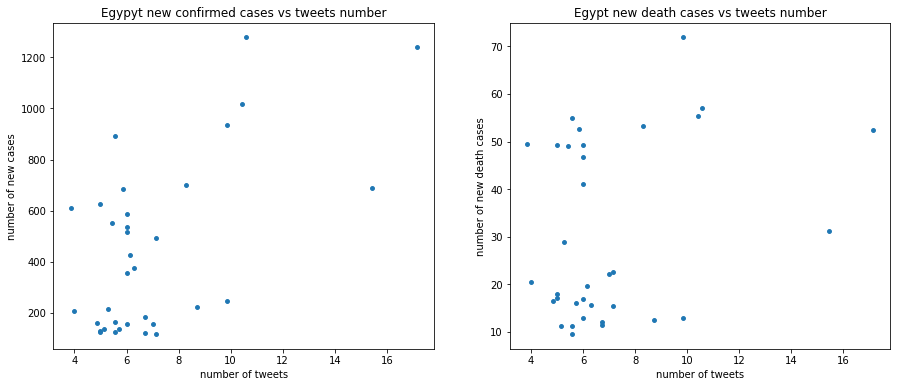

In [26]:
#draw the scatter plot
plt.figure(figsize=(15,6)) 
ax1 = plt.subplot(1,2,1)
ax1 =plt.scatter(eg_twitter_df['count'],eg_twitter_df['new_cases'],s=15)
ax1 =plt.xlabel('number of tweets')
ax1 =plt.ylabel('number of new cases')
ax1 =plt.title('Egypyt new confirmed cases vs tweets number')
ax2 = plt.subplot(1,2,2)
ax2 =plt.scatter(eg_twitter_df['count'],eg_twitter_df['new_deaths'],s=15)
ax2 =plt.xlabel('number of tweets')
ax2 =plt.ylabel('number of new death cases')
ax2 =plt.title('Egypt new death cases vs tweets number')


plt.show()

Sentiment Analysis with the help of WordBlod

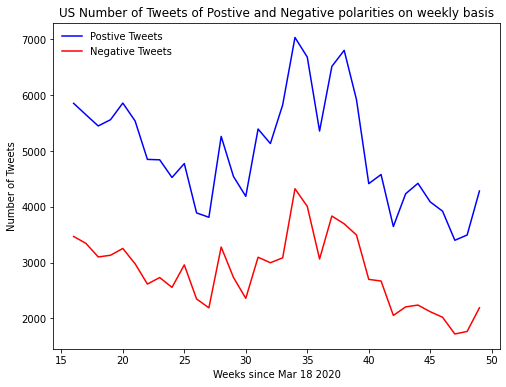

In [27]:
us_twitter_df = us_twitter_df.sort_values(by = ['week_index'],ascending=True)
plt.figure(figsize=(8,6))
plt.plot(us_twitter_df['week_index'],us_twitter_df['Postive_tweets'],'b')
plt.plot(us_twitter_df['week_index'],us_twitter_df['Negative_tweets'],'r')
plt.xlabel("Weeks since Mar 18 2020")
plt.ylabel('Number of Tweets')
plt.title("US Number of Tweets of Postive and Negative polarities on weekly basis")
plt.legend(['Postive Tweets','Negative Tweets'],loc = 2,frameon =False)
plt.show()

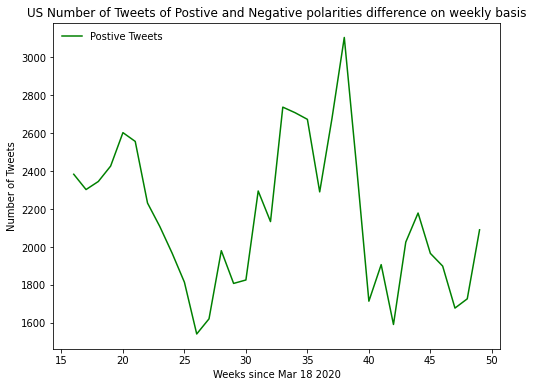

In [31]:
us_twitter_df = us_twitter_df.sort_values(by = ['week_index'],ascending=True)
plt.figure(figsize=(8,6))
plt.plot(us_twitter_df['week_index'],us_twitter_df['Postive_tweets']-us_twitter_df['Negative_tweets'],'g')
plt.xlabel("Weeks since Mar 18 2020")
plt.ylabel('Number of Tweets')
plt.title("US Number of Tweets of Postive and Negative polarities difference on weekly basis")
plt.legend(['Postive Tweets','Negative Tweets'],loc = 2,frameon =False)
plt.show()

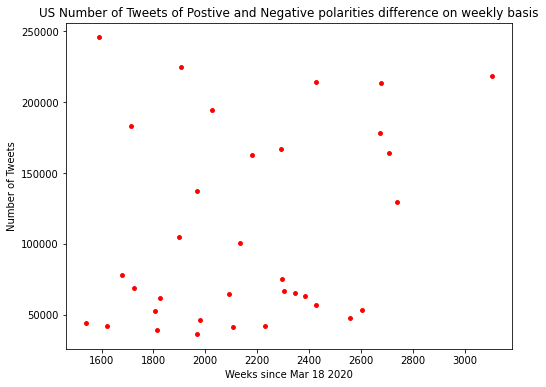

In [29]:
us_twitter_df = us_twitter_df.sort_values(by = ['week_index'],ascending=True)
plt.figure(figsize=(8,6))
plt.scatter(us_twitter_df['Postive_tweets']-us_twitter_df['Negative_tweets'],us_twitter_df['new_cases'],s=15,c ='r')
plt.xlabel("Weeks since Mar 18 2020")
plt.ylabel('Number of Tweets')
plt.title("US Number of Tweets of Postive and Negative polarities difference on weekly basis")
plt.show()

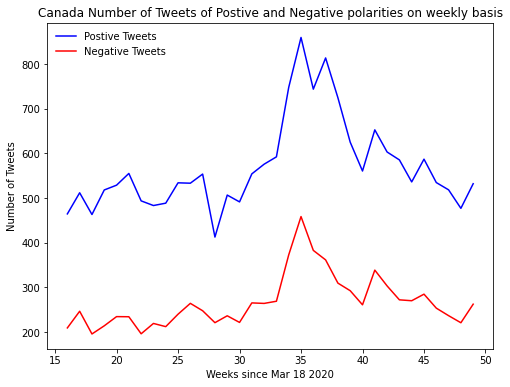

In [30]:
ca_twitter_df = ca_twitter_df.sort_values(by = ['week_index'],ascending=True)
plt.figure(figsize=(8,6))
plt.plot(ca_twitter_df['week_index'],ca_twitter_df['Postive_tweets'],'b')
plt.plot(ca_twitter_df['week_index'],ca_twitter_df['Negative_tweets'],'r')
plt.xlabel("Weeks since Mar 18 2020")
plt.ylabel('Number of Tweets')
plt.title("Canada Number of Tweets of Postive and Negative polarities on weekly basis")
plt.legend(['Postive Tweets','Negative Tweets'],loc = 2,frameon =False)

plt.show()